In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%store -r draft_db

In [3]:
draft_db.head()

,Overall,Team,Player,Nat.,Pos,Age,To,Junior Team,League,GP,...,D0_GP,D0_G,D0_A,D0_TP,D0_P/G,D0_PIM,D0_+/-,NHLe Coefficient,NHLe,NHLer
25,1,Chicago Blackhawks,Patrick Kane,US,RW,18.0,2023.0,London Knights,OHL,1126.0,...,58,62,83,145,2.50,52,42.0,0.144,29.52000,1.0
3,2,Philadelphia Flyers,James van Riemsdyk,US,LW,18.0,2023.0,USA U-18 Development Team,USDP/NAHL,885.0,...,30,20,18,38,1.27,44,0.0,0.121,12.60094,1.0
5,3,Phoenix Coyotes,Kyle Turris,CA,C,18.0,2022.0,Burnaby,BCHL,776.0,...,53,66,55,121,2.28,83,0.0,0.080,14.95680,1.0
32,4,Los Angeles Kings,Thomas Hickey,CA,D,18.0,2022.0,Seattle Thunderbirds,WHL,456.0,...,68,9,41,50,0.74,70,15.0,0.141,8.55588,1.0
19,5,Washington Capitals,Karl Alzner,CA,D,18.0,2020.0,Calgary Hitmen,WHL,686.0,...,63,8,39,47,0.75,32,16.0,0.141,8.67150,1.0


## Data Exploration

<AxesSubplot: xlabel='GP', ylabel='NHLe'>

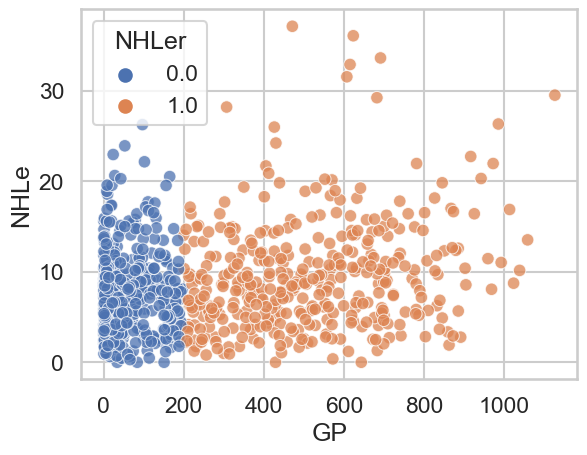

In [4]:
sns.set_theme(style='whitegrid', context='talk')

sns.scatterplot(x=draft_db['GP'], y=draft_db['NHLe'], hue=draft_db['NHLer'], alpha=0.75)

In [5]:
draft_db['NHLer'].value_counts()

0.0    1124
1.0     388
Name: NHLer, dtype: int64

In [6]:
# Get a baseline probability estimate for picks

NHLers=(draft_db[draft_db['NHLer'] == 1]['NHLer'].count())/(draft_db['NHLer'].count())

print(f'The proportion of players who become NHLers is {NHLers}')

The proportion of players who become NHLers is 0.2566137566137566


<AxesSubplot: xlabel='GP', ylabel='Count'>

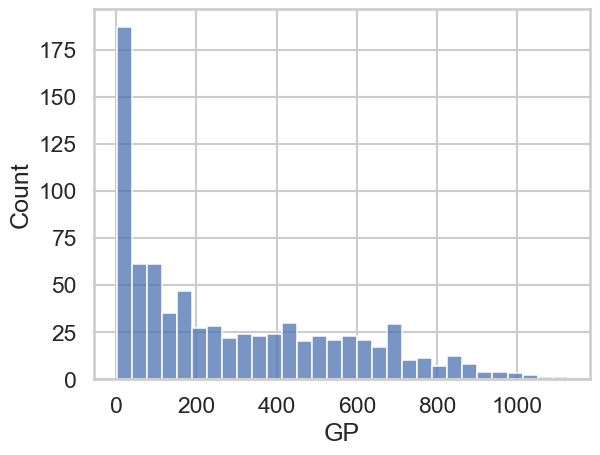

In [7]:
sns.set_theme(style='whitegrid', context='talk')

sns.histplot(draft_db['GP'], bins=30)

<AxesSubplot: xlabel='Overall', ylabel='PTS'>

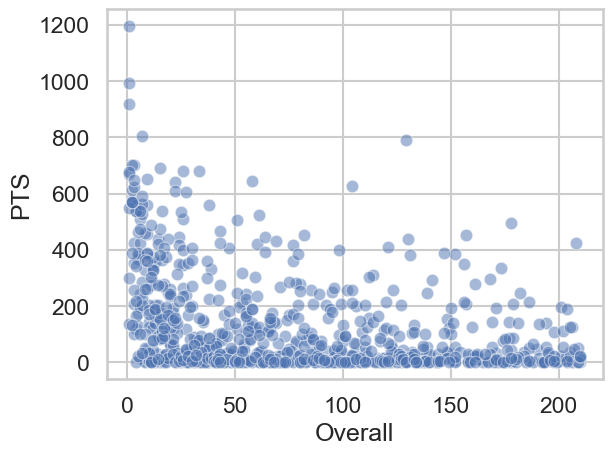

In [8]:
sns.set_theme(style='whitegrid', context='talk')

sns.scatterplot(x=draft_db['Overall'], y=draft_db['PTS'], alpha=0.5)

## Data Cleaning

In [9]:
draft_db.head()

,Overall,Team,Player,Nat.,Pos,Age,To,Junior Team,League,GP,...,D0_GP,D0_G,D0_A,D0_TP,D0_P/G,D0_PIM,D0_+/-,NHLe Coefficient,NHLe,NHLer
25,1,Chicago Blackhawks,Patrick Kane,US,RW,18.0,2023.0,London Knights,OHL,1126.0,...,58,62,83,145,2.50,52,42.0,0.144,29.52000,1.0
3,2,Philadelphia Flyers,James van Riemsdyk,US,LW,18.0,2023.0,USA U-18 Development Team,USDP/NAHL,885.0,...,30,20,18,38,1.27,44,0.0,0.121,12.60094,1.0
5,3,Phoenix Coyotes,Kyle Turris,CA,C,18.0,2022.0,Burnaby,BCHL,776.0,...,53,66,55,121,2.28,83,0.0,0.080,14.95680,1.0
32,4,Los Angeles Kings,Thomas Hickey,CA,D,18.0,2022.0,Seattle Thunderbirds,WHL,456.0,...,68,9,41,50,0.74,70,15.0,0.141,8.55588,1.0
19,5,Washington Capitals,Karl Alzner,CA,D,18.0,2020.0,Calgary Hitmen,WHL,686.0,...,63,8,39,47,0.75,32,16.0,0.141,8.67150,1.0


In [10]:
draft_db = draft_db.reset_index()

In [11]:
draft_db = draft_db.drop(['index'], axis=1)

In [12]:
draft_db.head(30)

,Overall,Team,Player,Nat.,Pos,Age,To,Junior Team,League,GP,...,D0_GP,D0_G,D0_A,D0_TP,D0_P/G,D0_PIM,D0_+/-,NHLe Coefficient,NHLe,NHLer
0,1,Chicago Blackhawks,Patrick Kane,US,RW,18.0,2023.0,London Knights,OHL,1126.0,...,58,62,83,145,2.50,52,42.0,0.144,29.52000,1.0
1,2,Philadelphia Flyers,James van Riemsdyk,US,LW,18.0,2023.0,USA U-18 Development Team,USDP/NAHL,885.0,...,30,20,18,38,1.27,44,0.0,0.121,12.60094,1.0
2,3,Phoenix Coyotes,Kyle Turris,CA,C,18.0,2022.0,Burnaby,BCHL,776.0,...,53,66,55,121,2.28,83,0.0,0.080,14.95680,1.0
3,4,Los Angeles Kings,Thomas Hickey,CA,D,18.0,2022.0,Seattle Thunderbirds,WHL,456.0,...,68,9,41,50,0.74,70,15.0,0.141,8.55588,1.0
4,5,Washington Capitals,Karl Alzner,CA,D,18.0,2020.0,Calgary Hitmen,WHL,686.0,...,63,8,39,47,0.75,32,16.0,0.141,8.67150,1.0
5,6,Edmonton Oilers,Sam Gagner,CA,C,18.0,2023.0,London Knights,OHL,985.0,...,53,35,83,118,2.23,36,32.0,0.144,26.33184,1.0
6,7,Columbus Blue Jackets,Jakub Voracek,CZ,RW,18.0,2023.0,Halifax Mooseheads,QMJHL,1058.0,...,59,23,63,86,1.46,26,-7.0,0.113,13.52836,1.0
7,8,Boston Bruins,Zach Hamill,CA,C,18.0,2012.0,Everett Silvertips,WHL,20.0,...,69,32,61,93,1.35,90,16.0,0.141,15.60870,0.0
8,9,San Jose Sharks,Logan Couture,CA,C,18.0,2023.0,Ottawa 67's,OHL,867.0,...,54,26,52,78,1.44,24,-1.0,0.144,17.00352,1.0
9,10,Florida Panthers,Keaton Ellerby,CA,D,18.0,2015.0,Kamloops Blazers,WHL,212.0,...,69,2,23,25,0.36,120,-2.0,0.141,4.16232,1.0


In [13]:
draft_db.shape

(1512, 27)

In [14]:
draft_db.columns

Index(['Overall', 'Team', 'Player', 'Nat.', 'Pos', 'Age', 'To', 'Junior Team',
       'League', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'Height', 'Weight',
       'D0_GP', 'D0_G', 'D0_A', 'D0_TP', 'D0_P/G', 'D0_PIM', 'D0_+/-',
       'NHLe Coefficient', 'NHLe', 'NHLer'],
      dtype='object')

In [15]:
# Create dataframe column with feet from player's height
draft_db['Feet'] = draft_db['Height'].str.extract('(\d+)', expand=False)

In [16]:
# Set an empty list to capture the last 3 strings from the height column

inches=[]

draft_db['Height'].str.split()

for row in range(len(draft_db)):
    inches.append(draft_db['Height'][row][-3:])

In [17]:
# Convert Feet column from string to integer
draft_db['Feet'] = draft_db['Feet'].astype(int)

In [18]:
draft_db['inches'] = inches

In [19]:
# Create dataframe column with inches from players height
draft_db['inches'] = draft_db['inches'].str.extract('(\d+)', expand=False)

In [20]:
# Convert inches column from string to integer
draft_db['inches'] = draft_db['inches'].astype(int)

In [21]:
# Create a column of the total inches of each player to be converted into centimeters
draft_db['totalinches'] = (draft_db['Feet']*12)+draft_db['inches']

In [22]:
# Replace Height column with float values and heights in centimeters
draft_db['Height'] = draft_db['totalinches']*2.54

In [23]:
# Drop the columns that were created for the height conversion
draft_db = draft_db.drop(['Feet', 'inches', 'totalinches'], axis=1)

In [24]:
draft_db.columns

Index(['Overall', 'Team', 'Player', 'Nat.', 'Pos', 'Age', 'To', 'Junior Team',
       'League', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'Height', 'Weight',
       'D0_GP', 'D0_G', 'D0_A', 'D0_TP', 'D0_P/G', 'D0_PIM', 'D0_+/-',
       'NHLe Coefficient', 'NHLe', 'NHLer'],
      dtype='object')

In [25]:
# Replace F values with C (these three players are listed as centers on Eliteprospects)
draft_db['Pos'] = draft_db['Pos'].replace('F', 'C')

In [26]:
# Convert mispelled columns to standard C position
draft_db['Pos'] = draft_db['Pos'].replace('Centr', 'C')

In [27]:
draft_db['Pos'] = draft_db['Pos'].replace('C/W', 'C')
draft_db['Pos'] = draft_db['Pos'].replace('C/RW', 'RW')
draft_db['Pos'] = draft_db['Pos'].replace('C/LW', 'LW')
draft_db['Pos'] = draft_db['Pos'].replace('L/RW', 'RW')
draft_db['Pos'] = draft_db['Pos'].replace('W', 'RW')

In [28]:
draft_db['Pos'].unique()

array(['RW', 'LW', 'C', 'D'], dtype=object)

In [29]:
draft_db[['Age', 'Weight', 'D0_GP', 'D0_PIM']] = draft_db[['Age', 'Weight', 'D0_GP', 'D0_PIM']].astype(float)

In [30]:
# Split data into data and target variable

x_db = draft_db[['Pos', 'Age', 'Height',
                 'Weight', 'D0_GP', 
                 'D0_PIM', 'D0_+/-','NHLe']]
y_db = draft_db['NHLer']

In [31]:
# Check for null values

x_db.isnull().sum()

Pos       0
Age       0
Height    0
Weight    0
D0_GP     0
D0_PIM    0
D0_+/-    2
NHLe      0
dtype: int64

In [32]:
# Fill in +/- null values with 0

x_db['D0_+/-'] = x_db.loc[:,'D0_+/-'].fillna(0)

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_98643/1318484802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_db['D0_+/-'] = x_db.loc[:,'D0_+/-'].fillna(0)


In [33]:
x_db.isnull().sum()

Pos       0
Age       0
Height    0
Weight    0
D0_GP     0
D0_PIM    0
D0_+/-    0
NHLe      0
dtype: int64

In [34]:
x_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     1512 non-null   object 
 1   Age     1512 non-null   float64
 2   Height  1512 non-null   float64
 3   Weight  1512 non-null   float64
 4   D0_GP   1512 non-null   float64
 5   D0_PIM  1512 non-null   float64
 6   D0_+/-  1512 non-null   float64
 7   NHLe    1512 non-null   float64
dtypes: float64(7), object(1)
memory usage: 94.6+ KB


## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x_db, y_db, test_size=0.25, random_state=42)

In [37]:
X_train.shape

(1134, 8)

In [38]:
X_test.shape

(378, 8)

## Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

### One hot encode the categorical variables

In [40]:
ohe = OneHotEncoder(sparse=False)

### Instantiate PCA for categorical variables

In [41]:
# Select number of principle components
pca = PCA(n_components=1)

### Instantiate SelectKbest for numeric variables

In [42]:
# Instantiate SelectKBest Variable
selection = SelectKBest(k=5)

### Instantiate Standard Scaler for numeric variables

In [71]:
scaler=StandardScaler()

### Set up classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

Gb_clf = GradientBoostingClassifier()

### Set up pipeline

In [45]:
# define individual transformers in a pipeline

categorical_preprocessing = Pipeline([('ohe', OneHotEncoder(sparse=False)),
                                     ('PCA', pca)])

numerical_preprocessing = Pipeline([('scale', StandardScaler()),
                                   ('selectK_best', selection)])

In [46]:
preprocess = ColumnTransformer([
    ('categorical_preprocessing', categorical_preprocessing, ['Pos']),
    ('numerical_preprocessing', numerical_preprocessing, ['Age', 'Height', 'Weight',
                                                          'D0_GP', 'D0_PIM',
                                                          'D0_+/-', 'NHLe'])
])
    
preprocess

ColumnTransformer(transformers=[('categorical_preprocessing',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(sparse=False)),
                                                 ('PCA', PCA(n_components=1))]),
                                 ['Pos']),
                                ('numerical_preprocessing',
                                 Pipeline(steps=[('scale', StandardScaler()),
                                                 ('selectK_best',
                                                  SelectKBest(k=5))]),
                                 ['Age', 'Height', 'Weight', 'D0_GP', 'D0_PIM',
                                  'D0_+/-', 'NHLe'])])

In [47]:
# create the final pipeline with preprocessing steps and 
# the final classifier step
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('best_model', Gb_clf)
])

pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_preprocessing',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False)),
                                                                  ('PCA',
                                                                   PCA(n_components=1))]),
                                                  ['Pos']),
                                                 ('numerical_preprocessing',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler()),
                                                                  ('selectK_best',
                                                                   SelectKBest(k=5))]),
                                                  ['Age', 'Height', 'Weight',
                                                   'D0_GP', 'D0_PIM', 'D0_+/-',
                                                   'NHLe'])])),
                ('best_model', GradientBoostingClassifier())])

In [48]:
# Call the pipeline on the training data

xgb_model = pipeline.fit(X_train, y_train)

In [49]:
xgb_model.score(X_test, y_test)

0.7619047619047619

In [50]:
xgb_model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

In [51]:
from sklearn.metrics import f1_score, precision_score, recall_score

y_pred = xgb_model.predict(X_test)

print(f' The F1 score is :', f1_score(y_test, y_pred))
print(f' The precision score is :', precision_score(y_test, y_pred))
print(f' The recall score is :', recall_score(y_test, y_pred))

 The F1 score is : 0.22413793103448273
 The precision score is : 0.43333333333333335
 The recall score is : 0.1511627906976744


In [52]:
feat_names = pipeline.steps[0][1].get_feature_names_out()

In [53]:
feat_import = pipeline.steps[1][1].feature_importances_

<AxesSubplot: >

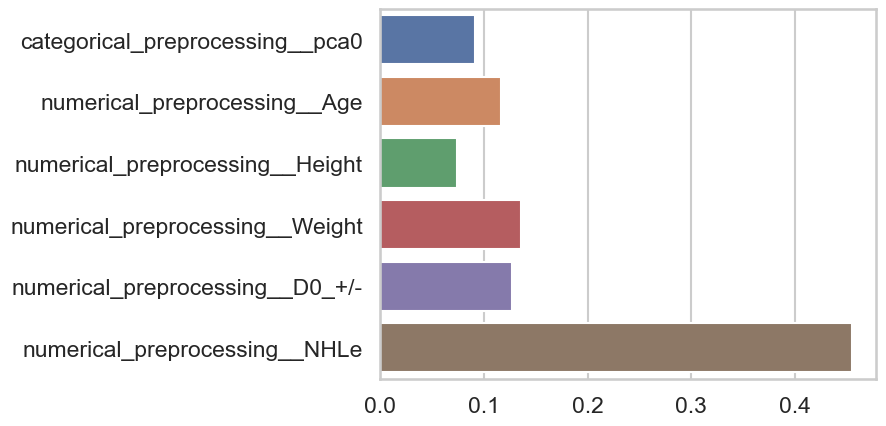

In [54]:
sns.set_theme(style='whitegrid', context='talk')

sns.set_color_codes('pastel')
sns.barplot(x=feat_import, y=feat_names)

### Create NHLer probability column in overall dataframe

In [55]:
NHLer_probability = []

for player in range(len(pipeline.predict_proba(X_test))):
    NHLer_probability.append((pipeline.predict_proba(X_test)[player][1]))

In [56]:
X_test['NHL probability'] = NHLer_probability

In [57]:
X_test.head()

,Pos,Age,Height,Weight,D0_GP,D0_PIM,D0_+/-,NHLe,NHL probability
907,RW,18.0,190.50,193.0,71.0,53.0,13.0,4.27794,0.107602
617,D,18.0,187.96,170.0,25.0,8.0,0.0,2.44032,0.309155
1386,D,18.0,185.42,181.0,22.0,0.0,0.0,1.97456,0.129822
941,D,19.0,187.96,183.0,22.0,4.0,2.0,5.69736,0.359143
303,D,18.0,187.96,212.0,60.0,145.0,1.0,5.27670,0.256934


In [58]:
NHLer_proba = []

for player in range(len(pipeline.predict_proba(X_train))):
    NHLer_proba.append((pipeline.predict_proba(X_train)[player][1]))

In [59]:
X_train['NHL probability'] = NHLer_proba

In [60]:
X_train.head()

,Pos,Age,Height,Weight,D0_GP,D0_PIM,D0_+/-,NHLe,NHL probability
1149,RW,18.0,180.34,190.0,72.0,47.0,25.0,9.82770,0.246209
1258,D,18.0,193.04,228.0,39.0,27.0,20.0,2.42802,0.147676
1063,LW,20.0,187.96,190.0,34.0,67.0,3.0,4.61332,0.068327
816,C,18.0,182.88,190.0,59.0,101.0,22.0,6.37632,0.146898
1239,RW,18.0,185.42,213.0,62.0,43.0,14.0,5.25866,0.171903


In [61]:
# Concatenate the train and test data with the NHLer probabilities

NHLer_db = pd.concat([X_train, X_test], axis=0)

In [62]:
# Re-sort the index to match the original dataframe

NHLer_db.sort_index(inplace=True)

In [63]:
# Create column in the original dataframe called "NHLer probabilities"

draft_db['NHL probability'] = NHLer_db['NHL probability']

In [64]:
draft_db.head()

,Overall,Team,Player,Nat.,Pos,Age,To,Junior Team,League,GP,...,D0_G,D0_A,D0_TP,D0_P/G,D0_PIM,D0_+/-,NHLe Coefficient,NHLe,NHLer,NHL probability
0,1,Chicago Blackhawks,Patrick Kane,US,RW,18.0,2023.0,London Knights,OHL,1126.0,...,62,83,145,2.50,52.0,42.0,0.144,29.52000,1.0,0.802394
1,2,Philadelphia Flyers,James van Riemsdyk,US,LW,18.0,2023.0,USA U-18 Development Team,USDP/NAHL,885.0,...,20,18,38,1.27,44.0,0.0,0.121,12.60094,1.0,0.489570
2,3,Phoenix Coyotes,Kyle Turris,CA,C,18.0,2022.0,Burnaby,BCHL,776.0,...,66,55,121,2.28,83.0,0.0,0.080,14.95680,1.0,0.761242
3,4,Los Angeles Kings,Thomas Hickey,CA,D,18.0,2022.0,Seattle Thunderbirds,WHL,456.0,...,9,41,50,0.74,70.0,15.0,0.141,8.55588,1.0,0.484045
4,5,Washington Capitals,Karl Alzner,CA,D,18.0,2020.0,Calgary Hitmen,WHL,686.0,...,8,39,47,0.75,32.0,16.0,0.141,8.67150,1.0,0.494822


### Run a mock draft with the sorted probabilities

In [65]:
# Re-create the 2007 draft with the NHLe and NHLer probabilities

mock_2007=draft_db.loc[:189]

In [66]:
mock_selections=mock_2007.sort_values('NHL probability', ascending=False)

In [67]:
mock_selections.iloc[5::31]

,Overall,Team,Player,Nat.,Pos,Age,To,Junior Team,League,GP,...,D0_G,D0_A,D0_TP,D0_P/G,D0_PIM,D0_+/-,NHLe Coefficient,NHLe,NHLer,NHL probability
66,71,Florida Panthers,Evgenii Dadonov,RU,RW,18.0,2023.0,Traktor Chelyabinsk,Russia,429.0,...,0,0,0,0.00,10.0,-3.0,0.772,0.00000,1.0,0.714311
42,44,St. Louis Blues,Aaron Palushaj,US,RW,18.0,2014.0,Des Moines Buccaneers,USHL,68.0,...,22,45,67,1.20,62.0,5.0,0.143,14.07120,0.0,0.407915
181,201,San Jose Sharks,Justin Braun,US,D,20.0,2023.0,Massachusetts,H-East,810.0,...,4,10,14,0.36,20.0,4.0,0.194,5.72688,1.0,0.270961
124,137,Los Angeles Kings,Joshua Turnbull,US,C,19.0,NaN,Waterloo Black Hawks,USHL,NaN,...,25,29,54,0.90,66.0,18.0,0.143,10.55340,0.0,0.210363
147,164,Toronto Maple Leafs,Chris Didomenico,CA,C,18.0,2018.0,Saint John Sea Dogs,QMJHL,27.0,...,25,50,75,1.07,60.0,-14.0,0.113,9.91462,0.0,0.137675
110,120,Ottawa Senators,Ben Blood,US,D,18.0,NaN,Shattuck-St. Mary's School,High-MN,NaN,...,11,25,36,0.57,144.0,0.0,0.024,1.12176,0.0,0.087267


In [68]:
mock_selections.iloc[::31]

,Overall,Team,Player,Nat.,Pos,Age,To,Junior Team,League,GP,...,D0_G,D0_A,D0_TP,D0_P/G,D0_PIM,D0_+/-,NHLe Coefficient,NHLe,NHLer,NHL probability
0,1,Chicago Blackhawks,Patrick Kane,US,RW,18.0,2023.0,London Knights,OHL,1126.0,...,62,83,145,2.50,52.0,42.0,0.144,29.52000,1.0,0.802394
71,76,New York Islanders,Jason Gregoire,CA,LW,18.0,NaN,Lincoln Stars,USHL,NaN,...,16,20,36,1.13,10.0,28.0,0.143,13.25038,0.0,0.425045
25,26,St. Louis Blues,David Perron,CA,LW,19.0,2023.0,Lewiston MAINEiacs,QMJHL,992.0,...,39,44,83,1.19,75.0,37.0,0.113,11.02654,1.0,0.277841
131,145,Vancouver Canucks,Charles-Antoine Messier,CA,C,18.0,NaN,Baie-Comeau Drakkar,QMJHL,NaN,...,27,21,48,0.70,67.0,15.0,0.113,6.48620,0.0,0.215268
120,133,Montreal Canadiens,Joe Stejskal,US,D,19.0,NaN,Grand Rapids HS,High-MN,NaN,...,14,20,34,1.36,0.0,0.0,0.024,2.67648,0.0,0.145846
135,149,Dallas Stars,Michael Neal,CA,LW,18.0,NaN,Belleville Bulls,OHL,NaN,...,4,4,8,0.15,25.0,-6.0,0.144,1.77120,0.0,0.096506
185,207,New Jersey Devils,Ryan Molle,CA,D,18.0,NaN,Swift Current Broncos,WHL,NaN,...,1,4,5,0.08,52.0,-15.0,0.141,0.92496,0.0,0.037542


In [70]:
mock_selections.head(50)

,Overall,Team,Player,Nat.,Pos,Age,To,Junior Team,League,GP,...,D0_G,D0_A,D0_TP,D0_P/G,D0_PIM,D0_+/-,NHLe Coefficient,NHLe,NHLer,NHL probability
0,1,Chicago Blackhawks,Patrick Kane,US,RW,18.0,2023.0,London Knights,OHL,1126.0,...,62,83,145,2.50,52.0,42.0,0.144,29.52000,1.0,0.802394
5,6,Edmonton Oilers,Sam Gagner,CA,C,18.0,2023.0,London Knights,OHL,985.0,...,35,83,118,2.23,36.0,32.0,0.144,26.33184,1.0,0.770647
162,179,Buffalo Sabres,Paul Byron,CA,C,18.0,2022.0,Gatineau Olympiques,QMJHL,521.0,...,21,23,44,0.65,46.0,7.0,0.113,6.02290,1.0,0.768939
2,3,Phoenix Coyotes,Kyle Turris,CA,C,18.0,2022.0,Burnaby,BCHL,776.0,...,66,55,121,2.28,83.0,0.0,0.080,14.95680,1.0,0.761242
87,95,Los Angeles Kings,Alec Martinez,US,D,20.0,2023.0,Miami,Ohio (CCHA,707.0,...,9,15,24,0.57,40.0,-3.0,0.194,9.06756,1.0,0.725151
66,71,Florida Panthers,Evgenii Dadonov,RU,RW,18.0,2023.0,Traktor Chelyabinsk,Russia,429.0,...,0,0,0,0.00,10.0,-3.0,0.772,0.00000,1.0,0.714311
8,9,San Jose Sharks,Logan Couture,CA,C,18.0,2023.0,Ottawa 67's,OHL,867.0,...,26,52,78,1.44,24.0,-1.0,0.144,17.00352,1.0,0.712743
43,45,Colorado Avalanche,Colby Cohen,US,D,18.0,2011.0,Lincoln Stars,USHL,3.0,...,13,47,60,1.13,110.0,5.0,0.143,13.25038,0.0,0.708329
144,161,Philadelphia Flyers,Patrick Maroon,US,LW,19.0,2023.0,St. Louis Bandits,NAHL,668.0,...,40,55,95,1.67,152.0,0.0,0.087,11.91378,1.0,0.683987
183,205,Atlanta Thrashers,Paul Postma,CA,D,18.0,2018.0,Swift Current Broncos,WHL,205.0,...,5,19,24,0.34,42.0,-19.0,0.141,3.93108,1.0,0.662851
